# Getting started

In [ ]:
!pip install pymongo
!pip install pymongo[snappy,gssapi,srv,tls]

In [ ]:
# Installing Mongodb:
# $ sudo apt-get install mongodb
!apt-get install mongodb

In [ ]:
# Doc:
# https://pymongo.readthedocs.io/en/stable/
# MongoDB as a service:
# https://cloud.mongodb.com/
# https://mlab.com/
import pymongo
from pprint import pprint
from platform import python_version

print(python_version())
print(pymongo.version)

In [ ]:
user = "user"
password = "XXX"
database = "UserData"
server = "practicas-shard-00-00.jb7nl.mongodb.net:27017,practicas-shard-00-01.jb7nl.mongodb.net:27017,practicas-shard-00-02.jb7nl.mongodb.net:27017"
options = "ssl=true&replicaSet=atlas-5ciesg-shard-0&authSource=admin&retryWrites=true&w=majority"
URI = "mongodb://"+ user + ":" + password + "@"+ server + "/" + database + "?" + options
client = pymongo.MongoClient(URI)

Create a new database ***db*** by providing the name of the database you created earlier. Initialise the collection by providing the ***collection*** name you created.

In [ ]:
db = client["UserData"]
collection = db["Flask_mongo"]

Now lets see how we can insert some data. You can do that by adding this statement in the python file :

In [ ]:
collection.insert_one({"_id":0, "user_name":"Soumi"})
collection.insert_one({"_id":100, "user_name":"Ravi"})

Now, lets see how we can delete posts :


In [ ]:
collection.delete_one({"_id":0, "user_name":"Soumi"})

This post will be deleted, and you will be able to view that from the database.

You can also add mutiple posts together like this :

In [ ]:
post1 = {"_id":"0", "user_name":"Soumi"}
post2 = {"_id":"100", "user_name":"Ravi"}
collection.insert_many([post1,post2])

Update a post with a certain ID :


In [ ]:
updated_user_name = "John"
collection.find_one_and_update({"_id":"0"}, {"$set" : {"user_name" : updated_user_name}}, upsert = False )

Finally, close the client to the server.

In [ ]:
client.close()

# Working with existing data

One of the great things about MongoDB is that it is really straight forward to load JSON files and add them to collections. For example if we had some JSON data stored in a JSON file, we could use the json library to read in this data and add it to a MongoDB collection:


In [ ]:
import json
with open('data_file.json') as f:
  file_data = json.load(f)

collection.insert_many(file_data)


You wouldn’t want to output the entire contents of a database with hundreds of thousands of documents. To view the file and see the structure of the data, you may instead output the first n documents instead. For example the first 10 documents. This can be achieved using the limit() function.


In [ ]:
for item in collection.find().limit(10):
    pprint(item)


To check the number of documents in a collection we can use the count_documents function like so:


In [ ]:
collection.count_documents({})

Again we could add a query here to count all the documents that meet some criteria of interest.

Next, try to connect to one of the default datasets that MongoDB provides:

In [ ]:
user = "user"
password = "demo"
database = "sample_restaurants"
server = "practicas-shard-00-00.jb7nl.mongodb.net:27017,practicas-shard-00-01.jb7nl.mongodb.net:27017,practicas-shard-00-02.jb7nl.mongodb.net:27017"
options = "ssl=true&replicaSet=atlas-5ciesg-shard-0&authSource=admin&retryWrites=true&w=majority"
URI = "mongodb://"+ user + ":" + password + "@"+ server + "/" + database + "?" + options
client = pymongo.MongoClient(URI)

In [ ]:
# Access to the database 'sample_restaurants', and then to collection 'restaurants'
# db = client["sample_restaurants"]
db = client.sample_restaurants
restaurants = db["restaurants"]

List the first ten restaurants in Bronx.

In [ ]:
for item in restaurants.find({"borough": "Bronx"}).limit(10):
    pprint(item)

# Aggregation

Often when working with data we don’t just want to extract subsets of data using queries, we instead want to produce new information from the existing data. This often involves carrying out various calculations like finding the average or sum of some value. For example the average wage of employees.

You can see details of the restaurant address, which borough it is in, the type of cuisine, name, id and details of grades awarded with associated scores. Let’s say we wanted to compute the average scores of the restaurants. To achieve this we can use the aggregate function.





In [ ]:
result = my_collection.aggregate(
  [
     {"$unwind": "$grades"},
     {"$match": {}}, 
     {"$group": {"_id": "$name", "Avg grade": {"$avg": "$grades.score"}}}
  ]
)


We pass an array to the aggregate function. The \$unwind parameter is used to deconstruct the grades array in order to output a document for each element. Next we use the \$match parameter including everything (by using open and closing braces). We could filter further here by providing additional criteria. Next we use the $group parameter to group the data that we want to apply the computation to. Finally we create new key called “Avg grade” and apply the \$avg (average) parameter to the grades scores referencing grades followed by a dot and the score key.

Producing the following output (shortened for brevity):



```
{'Avg grade': 15.2, '_id': 'Red Star Restaurant'}
{'Avg grade': 13.0, '_id': 'Weather Up'}
{'Avg grade': 9.4, '_id': 'La Nueva Playitas'}
{'Avg grade': 13.0, '_id': “Marcella’S Pizzeria & Catering”}
{'Avg grade': 9.0, '_id': 'Hot Wok'}
{'Avg grade': 9.333333333333334, '_id': '99 Favor Taste'}
{'Avg grade': 18.0, '_id': 'Flavors Corner'}
{'Avg grade': 10.666666666666666, '_id': 'Corona Restaurant'}
{'Avg grade': 9.0, '_id': 'Mila Cafe'}
{'Avg grade': 8.0, '_id': 'Circle Line Manhattan'}
{'Avg grade': 15.6, '_id': “The Old Time Vincent’S”}
{'Avg grade': 10.833333333333334, '_id': 'Riko'}
{'Avg grade': 10.0, '_id': 'Fresh Tortillas'}
{'Avg grade': 10.333333333333334, '_id': 'Le Village'}
{'Avg grade': 13.2, '_id': 'Ruay Thai Restaurant'}
{'Avg grade': 12.0, '_id': 'Lechonera Don Pancholo'}
{'Avg grade': 11.0, '_id': 'Pepe Rosso Social'}
```




There are many other parameters that can be used for common computations such as \$sum, \$min, \$max etc.

We can also add additional functionality as required. For example we might want to sort the returned in ascending or descending order. We could simply add another line with the sort parameter specifying which field to sort by. 1 (ascending) or -1 (descending).


In [ ]:
result = my_collection.aggregate(
  [
      {"$unwind": "$grades"},
      {"$match": {}}, 
      {"$group": {"_id": "$name", "Avg grade": {"$avg": "$grades.score"}}},
      {"$sort": {"Avg grade": -1}}
  ]
)


Another option to sort without using the aggregate function is to use the sort function directly passing in the field name, for example sorting by name:

In [ ]:
for item in my_collection.find().sort("name").limit(10):
    pprint(item)


We can choose ascending/descending by adding a 1 or -1 after the field to sort:


In [ ]:
for item in my_collection.find().sort("name", -1).limit(10):
    pprint(item)

# Pandas

Apart from integrating Mongo databases into software projects, we can also use this for research and data science/analysis tasks too. There is an easy way to convert data from a Mongo database into tabular form as a Panda’s dataframe object. Firstly we import the pandas library.

In [ ]:
import pandas as pd

Next we select the required data using a standard query, for example we will retrieve all the names for bakeries in the Bronx. Next we convert the results into a list data structure.

In [ ]:
extracted_data = restaurants.find({"borough": "Bronx", "cuisine": "Bakery"})
bronx_bakeries = list(extracted_data)
print(bronx_bakeries)

Finally we create a data frame using the **from_dict** function to convert the dictionaries into a tabular data frame:

In [ ]:
pd.DataFrame.from_dict(bronx_bakeries)

This produces the following output:


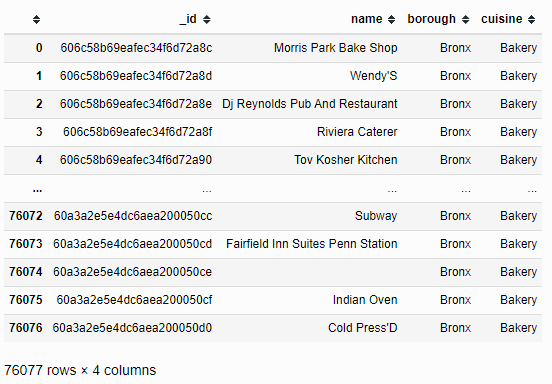

# Closing connection to the DB

Finally, close the client to the server.


In [ ]:
client.close()